In [10]:
%load_ext autoreload
%autoreload 2
from custom_imports import *
from mri_project.utility import *
from mri_project.contour_ops import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
image_dir = "/home/bzr0014/git/sesek2/mri_analysis/"

In [22]:
all_images = glob.glob(f"{image_dir}/**/*jpg", recursive=True)
non_raw_images = [x for x in all_images if '/raw/' not in x.lower()]
len(non_raw_images)

832

In [34]:
bar_lengths = pd.read_csv("bar_lengths.csv").set_index('file')
bar_lengths

,length in pixels
file,
4-COF7-22:50Behnam.jpg,519
2-COF7-12:50Behnam.jpg,519
1-COF7-6:50Behnam.jpg,519
3-COF7-17:50Behnam.jpg,519
1-COF5-5:50Behnam.jpg,522
4-COF5-21:50Behnam.jpg,519
2-COF5-11:50Behnam.jpg,519
3-COF5-16:50Behnam.jpg,519
1-COF2-6:50Behnam.jpg,519


In [36]:
all_lever_arms = {}
for file in non_raw_images[:5]:
    print(file)
    img = cv2.imread(file)
    lever_arms = show_lever_arms(img, 45, scale=10/bar_lengths.loc[file.split("/")[-1]], plot=False)
    all_lever_arms[file] = lever_arms

/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F7/4-COF7-22:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F7/2-COF7-12:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F7/1-COF7-6:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F7/3-COF7-17:50Behnam.jpg
/home/bzr0014/git/sesek2/mri_analysis/3.Contiguous Set#1/Control/Control - Pre/Female/Subject F5/1-COF5-5:50Behnam.jpg


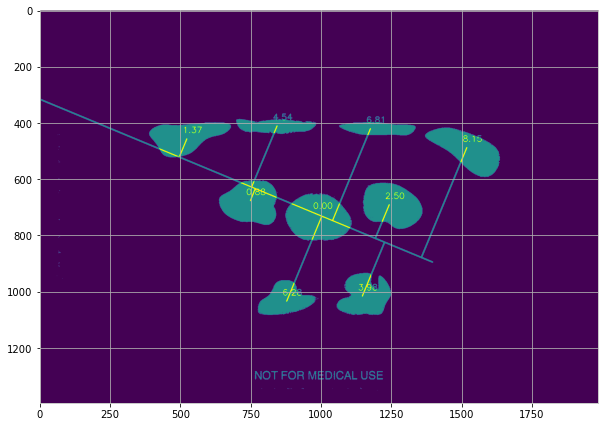

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.imshow(list(all_lever_arms.values())[0][1])